# 제주 재난지원금은 제주도 내 지역적 특성이 드러나게 이용되었는가?

1. 국내 다른 지역과의 제주도 인구대비 재난지원금 지급 추이 비교(간단히)
2. 제주도의 재난지원금 지급 방식
3. 제주 권역별로 어떤 산업이 발달했는지
4. 제주 권역별로 재난지원금이 어디 사용되었는지, 얼마나 사용되었는지 (송재용)
5. 제주도의 읍면동별 업종 분포와 읍면동별 재난지원금 사용률 시각화

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [305]:
data5_2 = pd.read_csv('data5_converted_177501_200000.csv')
data5_3 = pd.read_csv('data5_converted_200000_toend.csv')
data6_1 = pd.read_csv('jeju_data6_1_90000.csv')
data6_2 = pd.read_csv('jeju_data6_90000_189000.csv')
data_8 = pd.read_csv('jeju_data_8_completed.csv', encoding = "CP949")

In [306]:
data = pd.concat([data5_2, data5_3, data6_1, data6_2, data_8])
data = data.reset_index(drop=True)
#data_5.to_csv("jeju_data5_177501_toend.csv")

In [307]:
data["DONG"].unique()

array(['연동', '용담삼동', '강정동', '도두이동', '용담이동', '영남동', '오라삼동', '법환동', '오라이동',
       '서호동', '용담일동', '오라일동', '삼도일동', '삼도이동', '오등동', '도남동', '호근동', '이도일동',
       '일도일동', '건입동', '이도이동', '일도이동', '아라일동', '서홍동', '아라이동', '화북이동',
       '서귀동', '동홍동', '영평동', '화북일동', '토평동', '월평동', '상효동', '삼양삼동', '도련일동',
       '삼양이동', '봉개동', '보목동', '도련이동', '삼양일동', '신효동', '남원읍', '조천읍', '회천동',
       '하효동', '표선면', '구좌읍', '성산읍', '우도면', '한경면', '대정읍', '한림읍', '안덕면',
       '애월읍', '추자면', '하예동', '상예동', '색달동', '중문동', '외도일동', '외도이동', '대포동',
       '회수동', '내도동', '도평동', '하원동', '이호일동', '해안동', '이호이동', '노형동', '도순동',
       '도두일동', '용강동'], dtype=object)

In [308]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564765 entries, 0 to 564764
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     284680 non-null  float64
 1   OBJECTID       564765 non-null  int64  
 2   Field1         564765 non-null  int64  
 3   YM             564765 non-null  int64  
 4   SIDO           564765 non-null  object 
 5   SIGUNGU        564765 non-null  object 
 6   FranClass      564765 non-null  object 
 7   Type           564765 non-null  object 
 8   Time           564765 non-null  object 
 9   TotalSpent     564765 non-null  int64  
 10  DisSpent       564765 non-null  int64  
 11  NumofSpent     564765 non-null  int64  
 12  NumofDisSpent  564765 non-null  int64  
 13  POINT_X        564765 non-null  float64
 14  POINT_Y        564765 non-null  float64
 15  DONG           564765 non-null  object 
dtypes: float64(3), int64(7), object(6)
memory usage: 68.9+ MB


## 전처리

### a. 제주도 재난지원금 데이터: 권역설정

In [309]:
area_west_jeju = ['한경면', '한림읍', '애월읍']
area_east_jeju = ['조천읍', '구좌읍']
area_urban_jeju = ['외도이동', '외도일동', '내도동', '도평동', '해안동', '이호일동', '이호이동', '월평동', '도두일동', '노형동', '도두이동', '연동', '용담삼동', '용담이동', '오라삼동', '오라이동', '용담일동', '오라일동', '삼도일동', '삼도이동', '오등동', '도남동', '이도일동', '일도일동', '건입동', '이도이동', '일도이동', '아라일동', '아라이동', '화북이동', '화북일동', '영평동', '삼양삼동', '도련일동', '삼양이동', '봉개동', '도련이동', '삼양일동', '회천동', '용강동']
area_west_seoguipo = ['대정읍', '안덕면']
area_east_seoguipo = ['남원읍', '표선면', '성산읍']
area_urban_seoguipo = ['하예동', '상예동', '색달동', '중문동', '대포동', '하원동', '도순동', '강정동', '법환동', '서호동', '호근동', '서홍동', '서귀동', '동홍동', '토평동', '보목동', '상효동', '신효동', '하효동', '회수동', '영남동']
area_etc = ['추자면', '우도면']

In [310]:
data["AREA"] = ""
data.head(3)

,Unnamed: 0,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,DONG,AREA
0,177501.0,177502,177502,202005,제주특별자치도,제주시,영세,골프용품,17시,29000,0,1,0,126.489713,33.489049,연동,
1,177502.0,177503,177503,202005,제주특별자치도,제주시,영세,일반한식,17시,556000,112984,16,4,126.489713,33.489049,연동,
2,177503.0,177504,177504,202005,제주특별자치도,제주시,중소,악세사리,17시,275400,39900,6,1,126.489713,33.489049,연동,


In [311]:
condition_list = [
    (data['DONG'].isin(area_west_jeju)) ,
    (data['DONG'].isin(area_urban_jeju)),
    (data['DONG'].isin(area_east_jeju)),
    (data['DONG'].isin(area_west_seoguipo)),
    (data['DONG'].isin(area_urban_seoguipo)),
    (data['DONG'].isin(area_east_seoguipo)),
    (data['DONG'].isin(area_etc))]
choice_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
data['AREA'] = np.select(condition_list, choice_list, default='G')
data.sample(10)

,Unnamed: 0,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,DONG,AREA
24072,201574.0,201575,201575,202005,제주특별자치도,제주시,영세,미용원,18시,10000,0,1,0,126.530197,33.512976,일도일동,B
452342,NaN,167663,167663,202008,제주특별자치도,제주시,영세,미용원,16시,174000,0,5,0,126.573144,33.519338,화북일동,B
457191,NaN,172512,172512,202008,제주특별자치도,제주시,영세,일반서적,17시,135500,0,5,0,126.264718,33.413982,한림읍,A
293475,NaN,8796,8796,202008,제주특별자치도,제주시,영세,서양음식,01시,6000,0,1,0,126.794950,33.553248,구좌읍,C
170318,74638.0,74639,74639,202006,제주특별자치도,제주시,일반,서양음식,12시,804700,0,78,0,126.310552,33.461945,애월읍,A
147058,51378.0,51379,51379,202006,제주특별자치도,서귀포시,중소1,기타잡화,10시,187400,0,1,0,126.563178,33.241982,서귀동,E
402891,NaN,118212,118212,202008,제주특별자치도,제주시,중소,레져업소(회원제형태),14시,55000,0,5,0,126.482956,33.475443,노형동,B
509297,NaN,224618,224618,202008,제주특별자치도,서귀포시,중소1,편의점,19시,582340,0,52,0,126.654431,33.273657,남원읍,F
162354,66674.0,66675,66675,202006,제주특별자치도,제주시,일반,자동차부품,11시,7000,0,1,0,126.543615,33.482932,아라이동,B
557874,NaN,273195,273195,202008,제주특별자치도,제주시,영세,일반한식,x시,57000,0,2,0,126.492964,33.487736,연동,B


### b. 제주도 재난지원금 데이터: 업종설정

In [312]:
data.replace(dict.fromkeys(['택시', '기타교통수단', '통신기기'], '교통/통신'), inplace=True)
data.replace(dict.fromkeys(['대형할인점', '농축협직영매장', '농협하나로클럽', '편의점', '슈퍼마켓', '정육점', '기타유통업', '연쇄점', '상품권', '인삼제품', '홍삼제품', '농축수산품', '주류판매점', '기타건강식', '건강식품(회원제형태)'], '마트/편의점(유통)'), inplace=True)
data.replace(dict.fromkeys(['악기점', 'DVD음반테이프판매', '문화취미기타', '영화관', '티켓', '수족관', '화랑'], '영화/문화'), inplace=True)
data.replace(dict.fromkeys(['내의판매점', '양품점', '옷감직물', '귀금속', '기타직물', '스포츠의류', '가방', '정장', '악세사리', '기타잡화', '신발', '기타의류', '단체복', '아동의류', '캐쥬얼의류', '맞춤복점', '제화점', '인터넷Mall', '인터넷종합Mall'], '쇼핑/패션'), inplace=True)
data.replace(dict.fromkeys(['제과점', '스넥', '기타음료식품'], '카페/베이커리'), inplace=True)
data.replace(dict.fromkeys(['미용재료', '화장품', '피부미용실', '미용원', '이용원'], '뷰티'), inplace=True)
data.replace(dict.fromkeys(['구내매점', '단란주점', '주점', '서양음식', '일반한식', '일식회집', '중국음식',  '유흥주점', '칵테일바'], '외식/주점'), inplace=True)
data.replace(dict.fromkeys(['세탁소', '애완동물', '화원', '침구수예점', '성인용품점', '가전제품', '기타가구', '조명기구', '민예공예품', '주방용식기', '기타전기제품', '소프트웨어', '주방용구', '카페트커텐천막', '컴퓨터', '카메라', '일반가구', '정수기', '철제가구', '시계', '안경', '사우나', '안마스포츠마사지', '사진관', '인테리어', 'CATV'], '생활/기타'), inplace=True)
data.replace(dict.fromkeys(['완구점', '화방표구점', '문구용품', '일반서적', '출판인쇄물', '기타사무용', '사무기기', '전문서적', '정기간행물', '기타서적문구', '서적출판(회원제형태)'], '서점/문구'), inplace=True)
data.replace(dict.fromkeys(['기타보험', '손해보험'], '금융'), inplace=True)
data.replace(dict.fromkeys(['기념품점', '기타숙박업', '특급호텔', '2급호텔', '1급호텔', '콘도', '렌트카', '관광여행', '항공사', '여객선', '면세점'], '여행/숙박'), inplace=True)
data.replace(dict.fromkeys(['레져용품수리', '스포츠레져용품', '골프용품', '노래방', '당구장', '골프경기장', '볼링장', '골프연습장', '헬스크럽', '레져업소(회원제형태)', '기타레져업', '종합레져타운', '수영장', '테니스장', '기타회원제형태업소', ], '레저/스포츠'), inplace=True)
data.replace(dict.fromkeys(['유아원', '독서실', '보습학원', '기능학원', '기타교육', '외국어학원', '학원(회원제형태)', '예체능학원', '컴퓨터학원', '대학등록금', '학습지교육', '초중고교육기관'], '교육/육아'), inplace=True)
data.replace(dict.fromkeys(['주유소', '자동차정비', 'LPG', '세차장', '유류판매', '이륜차판매', '윤활유전문판매', '자동차시트타이어', '중고자동차', '수입자동차', '자동차부품', '주차장', '기타자동차서비스', '카인테리어', ], '주유/자동차'), inplace=True)
data.replace(dict.fromkeys(['약국', '종합병원', '기타의료기관및기기', '한약방', '제약회사', '의료용품', '건강진단', '한의원', '동물병원', '의원', '치과의원', '병원', '산후조리원', '치과병원'], '의료'), inplace=True)
data.replace(dict.fromkeys(['목재석재철물', '건축요업품', '골동품점', '기계공구', '기타건축자재', '보일러펌프', '페인트', '냉열기기', '유리', '과학기자재', '기타광학품', '기타연료', '중장비수리', ], '건설/제조'), inplace=True)
data.replace(dict.fromkeys(['기타농업관련', '비료농약사료종자', '농기계', '미곡상'], '농업'), inplace=True)
data.replace(dict.fromkeys(['사무서비스', '기타대인서비스', '화물운송', '보관창고업', '종합용역', '조세서비스', '가례서비스', '공공요금', '위탁급식업', '기타용역서비스', '기타수리서비스', '기타운송', '가정용품수리', '견인서비스', '부동산중개임대', '부동산분양', '신변잡화수리', '사무통신기기수리', '법률회계서비스', '사무서비스(회원제형태)', '정보서비스', '기타업종', '기타비영리유통'], '서비스/기타'), inplace=True)

In [313]:
data['Type'].unique()

array(['레저/스포츠', '외식/주점', '쇼핑/패션', '뷰티', '마트/편의점(유통)', '생활/기타', '카페/베이커리',
       '서비스/기타', '건설/제조', '주유/자동차', '교육/육아', '의료', '교통/통신', '여행/숙박',
       '서점/문구', '영화/문화', '농업', '금융'], dtype=object)

### c. 국내 재난지원금 지급 추이 데이터: 칼럼 타입 정리

In [314]:
fund = pd.read_csv("전국재난지원금현황.csv")
fund = fund.dropna()
fund.head()

,지역,소계,현금,신용체크카드,상품권,선불카드,금액
0,서울,"3,558,746","406,085","2,846,553","18,588","287,520","2,256,329"
1,부산,"1,224,116","239,161","833,351","4,420","147,184","783,091"
2,대구,"846,823","147,916","587,368","42,371","69,168","555,569"
3,인천,"1,085,203","144,178","760,323","180,702",0,"716,754"
4,광주,"485,532","76,166","377,352","32,014",0,"318,130"


In [315]:
# comma 없애주고 int 로 타입 캐스팅
fund['소계'] = fund['소계'].str.replace(',', '').astype(int)
fund['현금'] = fund['현금'].str.replace(',', '').astype(int)
fund['신용체크카드'] = fund['신용체크카드'].str.replace(',', '').astype(int)
fund['상품권'] = fund['상품권'].str.replace(',', '').astype(int)
fund['선불카드'] = fund['선불카드'].str.replace(',', '').astype(int)
fund['금액'] = fund['금액'].str.replace(',', '').astype(int)
fund.head()

,지역,소계,현금,신용체크카드,상품권,선불카드,금액
0,서울,3558746,406085,2846553,18588,287520,2256329
1,부산,1224116,239161,833351,4420,147184,783091
2,대구,846823,147916,587368,42371,69168,555569
3,인천,1085203,144178,760323,180702,0,716754
4,광주,485532,76166,377352,32014,0,318130


### d. 국내 재난지원금 지급 추이 데이터: 행정구역별 총 인구수 칼럼 추가

In [316]:
fund['지역'].unique()

array(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [317]:
# https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B040A3
population = [9668465, 3391946, 2418346, 2942828, 1450062, 1463882, 1136017, 355831, 13427014, 1542840, 1600837, 2121029, 1804104, 1851549, 2639422, 3340216, 674635]

In [318]:
fund['인구'] = 0
fund['인구'] = population

In [319]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      17 non-null     object
 1   소계      17 non-null     int64 
 2   현금      17 non-null     int64 
 3   신용체크카드  17 non-null     int64 
 4   상품권     17 non-null     int64 
 5   선불카드    17 non-null     int64 
 6   금액      17 non-null     int64 
 7   인구      17 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 1.2+ KB


## 1.  제주도 인구대비 재난지원금 지급 추이, 제주도 재난지원금 지급 형태

In [320]:
fund['인구대비지급건수추이'] = 0
fund['인구대비지급금액추이'] = 0

In [321]:
count = []
price = []
for i, j in fund.iterrows(): 
    count.append(fund['소계'][i]/ fund['인구'][i])
    price.append(fund['금액'][i] / fund['인구'][i])

In [322]:
fund['인구대비지급건수추이'] = count
fund['인구대비지급금액추이'] = price

[Text(0.5, 1.0, '국내 인구대비 재난지원금 지급 추이')]

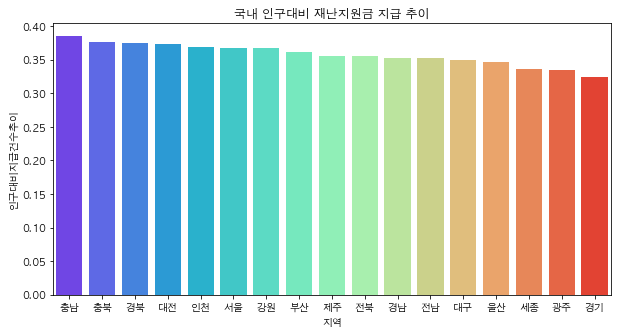

In [323]:
plt.figure(figsize = (10,5))
sns.barplot(data = fund, x = "지역", y = '인구대비지급건수추이', palette = "rainbow", order=fund.sort_values('인구대비지급건수추이', ascending = False).지역).set(title = "국내 인구대비 재난지원금 지급 추이")

[Text(0.5, 1.0, '국내 인구대비 재난지원금 지급 추이')]

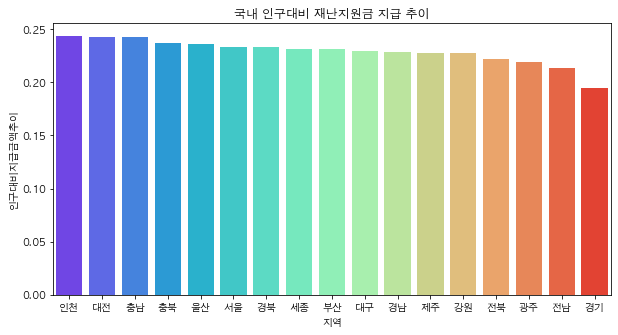

In [156]:
plt.figure(figsize = (10,5))
sns.barplot(data = fund, x = "지역", y = '인구대비지급금액추이', palette = "rainbow", order=fund.sort_values('인구대비지급금액추이', ascending = False).지역).set(title = "국내 인구대비 재난지원금 지급 추이")

In [325]:
# 제주도 지급 방식 vs 국내 지급방식
avg_cash = []
avg_credit = []
avg_gift = []
avg_card = []
for i, j in fund.iterrows(): 
    avg_cash.append(fund['현금'][i]/ fund['소계'][i])
    avg_credit.append(fund['신용체크카드'][i]/ fund['소계'][i])
    avg_gift.append(fund['상품권'][i]/ fund['소계'][i])
    avg_card.append(fund['선불카드'][i]/ fund['소계'][i])

In [326]:
fund['현금'] = avg_cash
fund['신용체크카드'] = avg_credit
fund['상품권'] = avg_gift
fund['선불카드'] = avg_card
fund['소계'] = 1

In [327]:
# 전국 사용량 평균
avg_all_cash = fund['현금'].mean()
avg_all_credit = fund['신용체크카드'].mean()
avg_all_gift = fund['상품권'].mean()
avg_all_card = fund['선불카드'].mean()

In [328]:
all_average = [avg_all_cash, avg_all_credit, avg_all_gift, avg_all_card]
jeju_average = fund.loc[16]
jeju_average = [jeju_average['현금'], jeju_average['신용체크카드'], jeju_average['상품권'], jeju_average['선불카드']]
label = ['현금', '신용체크카드', '상품권', '선불카드']

In [329]:
jeju_and_all = pd.DataFrame({'지급형식': label, '전국재난지원금' :all_average, '제주재난지원금':jeju_average})
jeju_and_all

,지급형식,전국재난지원금,제주재난지원금
0,현금,0.170755,0.141606
1,신용체크카드,0.720656,0.771432
2,상품권,0.047979,0.000021
3,선불카드,0.060610,0.086941


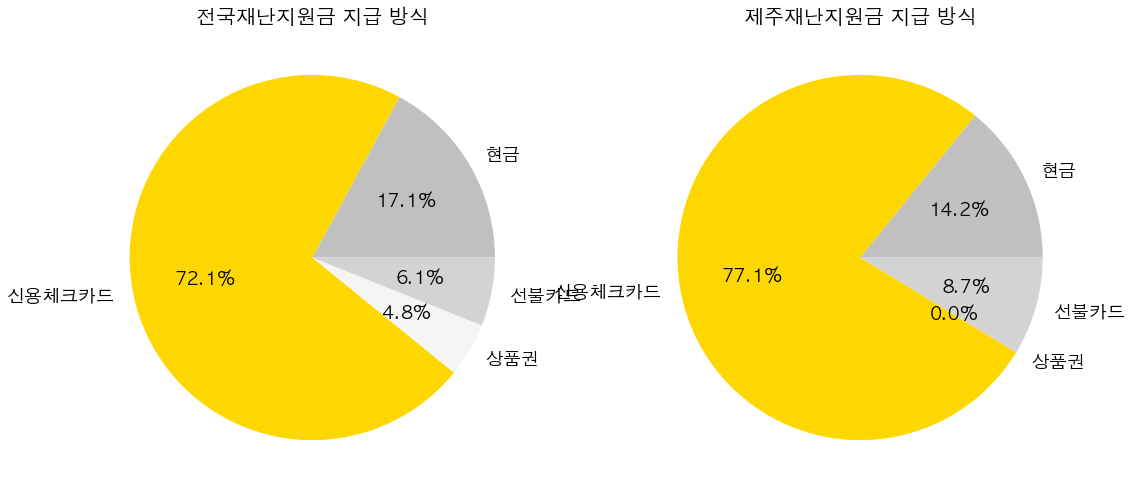

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

In [334]:
colors = ['silver', 'gold', 'whitesmoke', 'lightgray']

fig,ax = plt.subplots(1,2,figsize=(18,20))

plt.figure(figsize=(6,6))
ax[0].pie(jeju_and_all['전국재난지원금'], labels=jeju_and_all['지급형식'],autopct='%.1f%%', colors=colors, textprops={'fontsize':18})
ax[0].set_title('전국재난지원금 지급 방식', size=20)

plt.figure(figsize=(6,6))
ax[1].pie(jeju_and_all['제주재난지원금'], labels=jeju_and_all['지급형식'],autopct='%.1f%%', colors=colors, textprops={'fontsize':18})
ax[1].set_title('제주재난지원금 지급 방식', size=20)
plt.show()

In [211]:
# 총 사용금액에서 재난지원금 사용 금액이 차지하는 비중

In [252]:
total_spent = data.groupby('SIGUNGU')['TotalSpent'].sum().reset_index()
fund_spent = data.groupby('SIGUNGU')['DisSpent'].sum().reset_index()

In [257]:
total_dis_spend = total_spent.merge(fund_spent, on='SIGUNGU')

In [341]:
total_dis_spend

,SIGUNGU,TotalSpent,DisSpent
0,서귀포시,67021519250,2319784675
1,제주시,177599340361,7362079613


In [343]:
calc = []
for i, j in total_dis_spend.iterrows(): 
    calc.append(total_dis_spend['DisSpent'][i]/ total_dis_spend['TotalSpent'][i])
print(calc)

[0.03461253491355316, 0.04145330493928275]


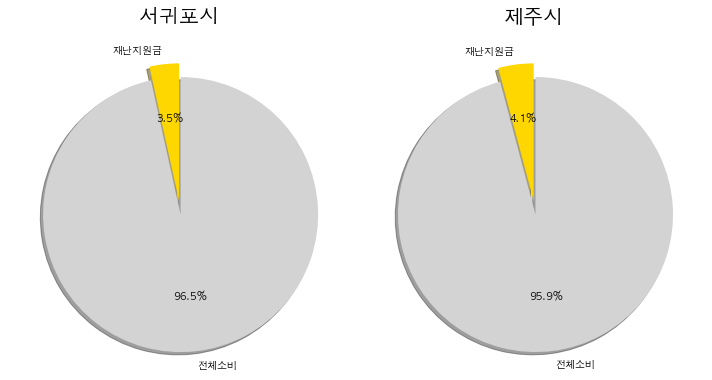

In [359]:
# Pie chart
labels = ['재난지원금', '전체소비']
sizes = [3.4612, 96.539]
sizes2 = [4.1453, 95.854]

# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.1)
# add colors
# colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
colors = ['gold','lightgray']
fig1, ax1 = plt.subplots(1,2,figsize=(10,15))

#fig1, ax1 = plt.subplots()
ax1[0].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1[0].set_title('서귀포시', size=20)

ax1[1].pie(sizes2, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1[1].set_title('제주시', size=20)


# Equal aspect ratio ensures that pie is drawn as a circle
#ax1.axis('equal')

plt.tight_layout()
plt.show()

## 2. 제주 내 권역별로 어떤 산업이 발전됐을까?

읍면동별 산업 분포도 카운트

In [277]:
# 권역별 상권 분포
grouped_type = data.groupby(['AREA', 'Type'])
grouped_type_count = grouped_type.count()['OBJECTID']
grouped_type_count

AREA  Type   
A     건설/제조       482
      교육/육아       526
      교통/통신        63
      농업          413
      레저/스포츠     1229
                 ... 
G     여행/숙박       147
      외식/주점      1482
      의료           34
      주유/자동차      102
      카페/베이커리     185
Name: OBJECTID, Length: 117, dtype: int64

In [304]:
# A: area_west_jeju: 한림, 애월
A_top_count = grouped_type_count["A"].sort_values(ascending=False)[0:10]
A_top_count

Type
외식/주점         15327
마트/편의점(유통)     6008
카페/베이커리        2110
여행/숙박          2009
레저/스포츠         1229
주유/자동차         1049
의료              780
생활/기타           763
쇼핑/패션           669
뷰티              585
Name: OBJECTID, dtype: int64

In [336]:
# B: area_urban_jeju: 제주 시내
B_top_count = grouped_type_count["B"].sort_values(ascending=False)[0:10]
B_top_count

Type
외식/주점         76810
마트/편의점(유통)    32372
카페/베이커리       15070
레저/스포츠        13050
뷰티            11365
의료            10292
교육/육아          9938
생활/기타          9450
쇼핑/패션          8180
주유/자동차         7206
Name: OBJECTID, dtype: int64

In [383]:
# C: area_east_jeju: 조천, 구좌
C_top_count = grouped_type_count["C"].sort_values(ascending=False)[0:10]
C_top_count

Type
외식/주점         11720
마트/편의점(유통)     3186
카페/베이커리        1484
여행/숙박          1162
주유/자동차          815
레저/스포츠          741
의료              598
생활/기타           462
쇼핑/패션           365
교육/육아           289
Name: OBJECTID, dtype: int64

In [382]:
# D: area_west_seoguipo: 대정, 안덕
D_top_count = grouped_type_count["D"].sort_values(ascending=False)[0:10]
D_top_count

Type
외식/주점         8246
마트/편의점(유통)    3420
카페/베이커리       1527
레저/스포츠         930
여행/숙박          676
주유/자동차         636
의료             524
생활/기타          498
뷰티             493
교육/육아          407
Name: OBJECTID, dtype: int64

In [384]:
import json
import folium
# 제주공항 좌표(33.510481369447554, 126.49145025928517
f = folium.Figure(width=500, height=400)

m = folium.Map(location = [33.510481369447554, 126.49145025928517],
               tiles = 'http://api.vworld.kr/req/wmts/1.0.0/5AA2EC51-9D9A-35A1-ABD2-ED58B40D7745/Base/{z}/{y}/{x}.png',
               attr = '제주도',
               zoom_start= 9)


m.add_to(f)

In [376]:
data = pd.DataFrame({
   'lat':[33.510481369447554, 33.41],
   'lon':[126.49145025928517, 126.41],
   'name':['haha','f'],
   'value':[100.0, 10.0]
})
data
 
f = folium.Figure(width=500, height=400)

# Make an empty map
m = folium.Map(location = [33.510481369447554, 126.49145025928517],
               tiles = 'http://api.vworld.kr/req/wmts/1.0.0/5AA2EC51-9D9A-35A1-ABD2-ED58B40D7745/Base/{z}/{y}/{x}.png',
               attr = '제주도',
               zoom_start= 9)
 
# I can add marker one by one on the map
for i in range(0,len(data)):
    folium.Circle(
      location=[data.iloc[i]['lon'], data.iloc[i]['lat']],
      popup=data.iloc[i]['name'],
      radius=data.iloc[i]['value']*10000,
      color='red',
      fill=True,
      fill_color='red'

    ).add_to(m)
m.add_to(f)
f

In [378]:
data

,lat,lon,name,value
0,33.510481,126.49145,haha,100.0
1,33.410000,126.41000,f,10.0


In [381]:
m = folium.Map(
    location=[33.41, 126.552],
    zoom_start=10
)
for i in data.index:
    folium.Circle(
        location = data.loc[i, ['lat', 'lon']],
        radius = 200,
        color='red'
    ).add_to(m)
    
    
# for i in df2.index:
#     folium.Circle(
#         location = df2.loc[i, ['lat', 'lng']],
#         radius = 200,
#         color='blue'
#     ).add_to(m)
# for i in df3.index:
#     folium.Circle(
#         location = df3.loc[i, ['lat', 'lng']],
#         radius = 200,
#         color='green'
#     ).add_to(m)
# for i in df4.index:
#     folium.Circle(
#         location = df4.loc[i, ['lat', 'lng']],
#         radius = 200,
#         color='yellow'
#     ).add_to(m)
m

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

- 제주도의 관광지에 많은 업종들이 몰려있음에 따라 자연스럽게 그 지역의 재난지원금 소비량이 제일 높음 (jeju_west, jeju_urban seogwipo_urban)
- 영웅님, 하람님이 분석하신 "국내 다른 지역과는 다른 제주도만의 특성"을 녹여넣으면 좋을 것 같음
- 신형님이 분석하신 "재난지원금이 소상공인들에게 적합하게 쓰였는가?" 에 대한 결론까지